<a href="https://colab.research.google.com/github/balajibetadur/fast-Sweeping/blob/main/FSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# part 1 OMPC

In [ ]:
#The fast sweeping method in two dimensions. 
#S. Luo, and J. Qian, "Fast Sweeping Methods for Factored Anisotropic 
#Eikonal Equations: Multiplicative and Additive Factors," J Sci Comput 52, 360-382 (2012)
#(a) shows the arrival times after sweeping up-right. 
#(b) is an image of the arrival times after a further sweep up-left. 
#(c) displays the arrival times, T, after a further sweep down right. 
#(d) shows the final state of the arrival times, which is obtained after
#a further sweep down-left. A fifth sweep is required which does not
#update any values for the method to reach its termination condition.

# number of grid
import numpy as np
n = 50
W = np.ones((n,n))
x0 = mcat([n / 2, OMPCSEMI, n / 2])
# interested domain
x = linspace(-1, 1, n)
y = linspace(-1, 1, n)
[X, Y] = meshgrid(x, y)
neigh = mcat([mcat([-1, OMPCSEMI, 0]), mcat([1, OMPCSEMI, 0]), mcat([0, OMPCSEMI, 1]), mcat([0, OMPCSEMI, -1]), mcat([-1, OMPCSEMI, -1]), mcat([1, OMPCSEMI, -1]), mcat([-1, OMPCSEMI, 1]), mcat([1, OMPCSEMI, 1])])
boundary = lambda x: mod(x - 1, n) + 1
ind2sub1 = lambda k: mcat([rem(k - 1, n) + 1, OMPCSEMI, (k - rem(k - 1, n) - 1) / n + 1])
sub2ind1 = lambda u: (u(2) - 1) * n + u(1)
Neigh = lambda k, i: sub2ind1(boundary(ind2sub1(k) + neigh(mslice[:], i)))


I = sub2ind1(x0)#19*40+20
#u:distance map
u = zeros(n) + Inf
u(I).lvalue = 0

[nodex, nodey] = size(u)
h = 1

[nodex, nodey] = size(u)
Order_j = mcat([mslice[1:nodex], OMPCSEMI, mslice[1:nodex], OMPCSEMI, mslice[nodex:-1:1], OMPCSEMI, mslice[nodex:-1:1]])
Order_i = mcat([mslice[1:nodey], OMPCSEMI, mslice[nodey:-1:1], OMPCSEMI, mslice[1:nodey], OMPCSEMI, mslice[nodey:-1:1]])
# Algorithm of sweeping
for O in mslice[1:4]:# different sweeping order
    for i in Order_i(O, mslice[1:50]):    #y
        for j in Order_j(O, mslice[:]):        #column
            # The Gauss Seidel loop
            # Only carry it out if the node hasn't been set initially
            if not (isnan(u(i, j))):
                if ((i > 1) and (i < nodey)):
                    uymin = min(u(i - 1, j), u(i + 1, j))
                elif (i == 1):
                    uymin = u(2, j)
                else:
                    uymin = u(nodey - 1, j)
                end
                if ((j > 1) and (j < nodex)):
                    uxmin = min(u(i, j - 1), u(i, j + 1))
                elif (j == 1):
                    uxmin = u(i, 2)
                else:
                    uxmin = u(i, nodex - 1)
                end
                if (abs(uxmin - uymin) >= h):
                    ubar = min(uxmin, uymin) + h
                else:
                    ubar = (uxmin + uymin + sqrt(2 * h ** 2 - (uxmin - uymin) ** 2)) / 2
                end
                u(i, j).lvalue = min(u(i, j), ubar)
            end        #if
        end
    end
end
figure()
[C, h] = contour(x, y, u); print C; print h
set(h, mstring('LineWidth'), 3)
set(gca, mstring('xtick'), mslice[-1:0.2:1])
set(gca, mstring('ytick'), mcat([mslice[-1:0.2:1]]))
set(gca, mstring('fontsize'), 18)
xlabel(mstring('x'))
ylabel(mstring('y'))

SyntaxError: ignored

# part 1 VIRGIN MATLAB

In [ ]:

# %The fast sweeping method in two dimensions. 
# %S. Luo, and J. Qian, "Fast Sweeping Methods for Factored Anisotropic 
# %Eikonal Equations: Multiplicative and Additive Factors," J Sci Comput 52, 360-382 (2012)
# %(a) shows the arrival times after sweeping up-right. 
# %(b) is an image of the arrival times after a further sweep up-left. 
# %(c) displays the arrival times, T, after a further sweep down right. 
# %(d) shows the final state of the arrival times, which is obtained after
# %a further sweep down-left. A fifth sweep is required which does not
# %update any values for the method to reach its termination condition.
# clear 
# % number of grid

import time


time_start = time.clock()
start_time = time.time()


n = 50;
W = ones(n);
x0=[n/2;n/2];
% interested domain
x = linspace(-1,1,n);
y = linspace(-1,1,n);
[X,Y] = meshgrid(x,y);
neigh = [[-1;0] [1;0] [0;1] [0;-1] [-1 ;-1] [1; -1] [-1; 1] [1 ;1]];
boundary = @(x)mod(x-1,n)+1;
ind2sub1 = @(k)[rem(k-1, n)+1; (k - rem(k-1, n) - 1)/n + 1];
sub2ind1 = @(u)(u(2)-1)*n+u(1);
Neigh = @(k,i) sub2ind1( boundary(ind2sub1(k)+neigh(:,i)) );


I = sub2ind1(x0);%19*40+20
%u:distance map
u = zeros(n)+Inf;
u(I) = 0;

[nodex,nodey]=size(u);
h=1;

[nodex,nodey]=size(u);
Order_j = [1:nodex;1:nodex;nodex:-1:1;nodex:-1:1];
Order_i = [1:nodey;nodey:-1:1;1:nodey;nodey:-1:1];
% Algorithm of sweeping
for O = 1:4% different sweeping order
for i=Order_i(O,1:50)%y
for j=Order_j(O,:)%column
% The Gauss Seidel loop
% Only carry it out if the node hasn't been set initially
if ~(isnan(u(i,j)))
if ((i>1) && (i<nodey))
uymin = min(u(i-1,j),u(i+1,j));
elseif (i==1)
uymin = u(2,j);
else
uymin = u(nodey-1,j);
end
if ((j>1)&&(j<nodex))
uxmin = min(u(i,j-1),u(i,j+1));
elseif (j==1)
uxmin = u(i,2);
else
uxmin = u(i,nodex-1);
end
if (abs(uxmin-uymin)>=h)
ubar = min(uxmin,uymin)+h;
else
ubar = (uxmin+uymin+sqrt(2*h^2-(uxmin-uymin)^2))/2;
end
u(i,j)=min(u(i,j),ubar);
end %if
end
end
end
figure;
[C,h]=contour(x,y,u)
set (h, 'LineWidth', 3);
set(gca,'xtick',-1:0.2:1)
set(gca,'ytick',[-1:0.2:1])
set(gca,'fontsize',18)
xlabel('x');
ylabel('y')


time_elapsed = (time.clock() - time_start)
print
'timeelapsed', time_elapsed
print("--- %s seconds ---" % (time.time() - start_time))


#part 1 python

In [ ]:
import cv2
img = cv2.imread('/content/map2.bmp')

In [ ]:
img.shape

(500, 500, 3)

In [ ]:

# %The fast sweeping method in two dimensions. 

# %S. Luo, and J. Qian, "Fast Sweeping Methods for Factored Anisotropic 
# %Eikonal Equations: Multiplicative and Additive Factors," J Sci Comput 52, 360-382 (2012)
# %(a) shows the arrival times after sweeping up-right. 
# %(b) is an image of the arrival times after a further sweep up-left. 
# %(c) displays the arrival times, T, after a further sweep down right. 
# %(d) shows the final state of the arrival times, which is obtained after
# %a further sweep down-left. A fifth sweep is required which does not
# %update any values for the method to reach its termination condition.
# clear 
# % number of grid




# n = 50;

# Image size
n = img.shape[0]

# W = ones(n);

# importing package
import numpy as np

# ctreating a mask of size n
# W = np.ones((n,n))

# x0=[n/2;n/2];
# centre of the image
x0 = [n/2,n/2]

# % interested domain
# x = linspace(-1,1,n);
# y = linspace(-1,1,n);

# generate 50 values between -1 and 1

# x = np.linspace(-1,1,n)

# y = np.linspace(-1,1,n)

# # [X,Y] = meshgrid(x,y);
# # creating a matrix with x and y
# [X,Y] = np.meshgrid(x,y)


# neigh = [[-1;0] [1;0] [0;1] [0;-1] [-1 ;-1] [1; -1] [-1; 1] [1 ;1]];
# # boundary values
# neigh = [[-1,0], [1,0], [0,1], [0,-1], [-1 ,-1], [1, -1], [-1, 1], [1 ,1]]

# # boundary = @(x)mod(x-1,n)+1;
# boundary = lambda x: mod(x - 1, n) + 1

# # ind2sub1 = @(k)[rem(k-1, n)+1; (k - rem(k-1, n) - 1)/n + 1];
# ind2sub1 = lambda k: ([np.fmod(k - 1, n) + 1, (k - np.fmod(k - 1, n) - 1) / n + 1])

# # sub2ind1 = @(u)(u(2)-1)*n+u(1);
# # sub2ind1 = lambda z: (z(2) - 1) * n + z(1)

# neigh_  = sum(neigh, []) 
# # Neigh = @(k,i) sub2ind1( boundary(ind2sub1(k)+neigh(:,i)) );
# Neigh = lambda k, i: sub2ind1(boundary(ind2sub1(k) + neigh_[i]))


# I = sub2ind1(x0);%19*40+20
# %u:distance map
# u = zeros(n)+Inf;
# u(I) = 0; bro audibel??

# I = int((x0[1] - 1) * n + x0[0])   #sub2ind1(x0)#19*40+20
#u:distance map

u = np.zeros((n,n)) + np.inf
#center point of grid
u[438, 23] = 0

# [nodex,nodey]=size(u);

[nodex, nodey] = u.shape

# h=1;
# equidistant step size between the grid points
h = 1

# Order_j = [1:nodex;1:nodex;nodex:-1:1;nodex:-1:1];
# Order_j = [range(1,nodex + 1),range(1,nodex + 1), range(1,nodex + 1)[::-1], range(1,nodex + 1)[::-1]]
#list to iterate for sweeps
Order_j = [range(nodex),range(nodex),range(nodex)[::-1],range(nodex)[::-1]]
Order_i = [range(nodey),range(nodey)[::-1],range(nodey),range(nodey)[::-1]]


# Order_i = [1:nodey;nodey:-1:1;1:nodey;nodey:-1:1];
# Order_i = [range(1,nodey + 1),range(1,nodey + 1), range(1,nodey + 1)[::-1], range(1,nodey + 1)[::-1]]


# % Algorithm of sweeping
# for O = 1:4% different sweeping order
# for i=Order_i(O,1:50)%y
# for j=Order_j(O,:)%column
# % The Gauss Seidel loop
# % Only carry it out if the node hasn't been set initially
# if ~(isnan(u(i,j)))
# if ((i>1) && (i<nodey))
# uymin = min(u(i-1,j),u(i+1,j));
# elseif (i==1)
# uymin = u(2,j);
# else
# uymin = u(nodey-1,j);
# end
# if ((j>1)&&(j<nodex))
# uxmin = min(u(i,j-1),u(i,j+1));
# elseif (j==1)
# uxmin = u(i,2);
# else
# uxmin = u(i,nodex-1);
# end
# if (abs(uxmin-uymin)>=h)
# ubar = min(uxmin,uymin)+h;
# else
# ubar = (uxmin+uymin+sqrt(2*h^2-(uxmin-uymin)^2))/2;
# end
# u(i,j)=min(u(i,j),ubar);
# end %if
# end
# end
# end
# figure;
# [C,h]=contour(x,y,u)
# set (h, 'LineWidth', 3);
# set(gca,'xtick',-1:0.2:1)
# set(gca,'ytick',[-1:0.2:1])
# set(gca,'fontsize',18)
# xlabel('x');
# ylabel('y')
import matplotlib.pyplot as plt


In [ ]:
# x0 = [img.shape[0]//2, img.shape[1]//2]

# img[img.shape[0]//2, img.shape[1]//2] = 0
# img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY_INV)
# u = img2gray.copy()

# [nodex, nodey] = mask.shape
# h = 1
# Order_j = [range(nodex),range(nodex),range(nodex)[::-1],range(nodex)[::-1]]
# Order_i = [range(nodey),range(nodey)[::-1],range(nodey),range(nodey)[::-1]]

In [ ]:
import math
import numpy as np
for O in range(0,4):# different sweeping order
    for i in Order_i[O]:    #y
        for j in Order_j[O]:#column
            # The Gauss Seidel loop
            # Only carry it out if the node hasn't been set initially
            if not (np.isnan(u[i, j])):  #if pixel value is present
            
                if ((i > 0) and (i < nodey - 1)):  #if not on boundary
                    uymin = min(u[i - 1, j], u[i + 1, j])
                elif (i == 0):
                    uymin = u[2, j]
                else:
                    uymin = u[nodey - 1, j]
                
                if ((j > 0) and (j < nodex - 1)):
                    uxmin = min(u[i, j - 1], u[i, j + 1])
                elif (j == 0):
                    uxmin = u[i, 2]
                else:
                    uxmin = u[i, nodex - 1]
                
                if (abs(uxmin - uymin) >= h):
                    ubar = min(uxmin, uymin) + h
                else:
                    ubar = (uxmin + uymin + math.sqrt(2 * h ** 2 - (uxmin - uymin) ** 2)) / 2
                
                u[i, j] = min(u[i, j], ubar)
                    #if
 
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


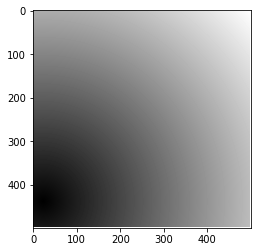

In [ ]:

import matplotlib.pyplot as plt

import numpy as np 
 # sample 2D array 
plt.imshow(u, cmap="gray") 
plt.show() 

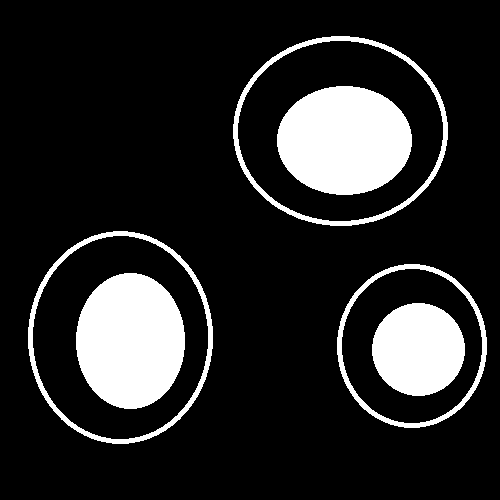

In [ ]:
#!pip install scikit-fmm
import numpy as np
# import pylab as plt
#import skfmm
import math
from math import sqrt, pi
from numpy import sin, cos, exp
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import time 

rows, cols, chamels = img.shape
roi = img[0:rows, 0:cols]


img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print img2gray
ret, mask = cv2.threshold(img2gray, 254, 255, cv2.THRESH_BINARY_INV)

cv2_imshow(mask)

In [ ]:
white = []
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] == 255:
            white.append([i,j])


In [ ]:
temp = u.copy()
for i in white:
    u[i[0]][i[1]] = np.inf

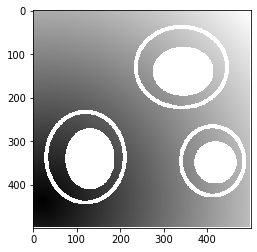

In [ ]:

import matplotlib.pyplot as plt

import numpy as np 
 # sample 2D array 
plt.imshow(u, cmap="gray") 

plt.show() 

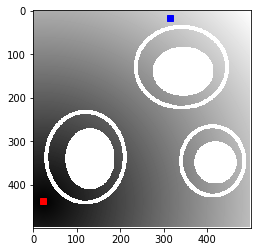

In [ ]:
Tx = 23
Ty = 438
#blue
ix = xpos = 314
iy = ypos = 16
m = 0
n = 0
distance = sqrt((xpos - Tx) ** 2 + (ypos - Ty) ** 2)
position = (xpos, ypos)
import matplotlib.pyplot as plt

import numpy as np 
 # sample 2D array 
plt.imshow(u, cmap="gray") 
#edit



#edit

plt.plot(xpos, ypos, 'bs')
plt.plot(Tx, Ty, 'rs')
plt.show() 

position : (314, 16)
distance: 512.6060865811096
position : (308, 22)
distance: 504.26282829492794
position : (302, 28)
distance: 495.9243893982227
position : (296, 34)
distance: 487.5910171444917
position : (290, 40)
distance: 479.26297582851106
position : (284, 46)
distance: 470.9405482648526
position : (278, 52)
distance: 462.62403742131687
position : (272, 52)
distance: 459.34409760004536
position : (266, 58)
distance: 451.05321193845856
position : (260, 64)
distance: 442.76969182634895
position : (254, 70)
distance: 434.493958531071
position : (248, 76)
distance: 426.22646562596276
position : (242, 82)
distance: 417.96770210149015
position : (236, 88)
distance: 409.71819583709
position : (230, 94)
distance: 401.47851748256716
position : (224, 100)
distance: 393.24928480545265
position : (218, 106)
distance: 385.0311675695878
position : (212, 112)
distance: 376.8248930206177
position : (206, 118)
distance: 368.6312520663434
position : (200, 124)
distance: 360.4511062543712
position

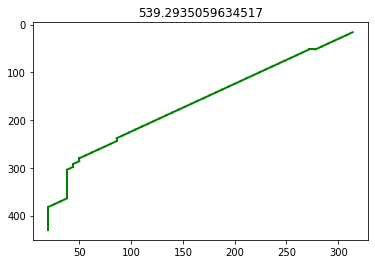

<Figure size 432x288 with 0 Axes>

In [ ]:
# fast marching
path = [[], []]
pathlength =0
li = []
def dist(x, y):
    distance = u[x][y]
    return distance
while distance > 10:

    value = []
    index = []
    position = (xpos, ypos)

    for M in range(-6, 7, 6):
        for N in range(-6, 7, 6):
            m = xpos + M
            n = ypos + N
            P = dist(n, m)
            if P > 0:
                value.append(P)
            else:
                value.append(10)
            # plt.plot(m,n,'ro')
            index.append((M, N))

    # path[0].append(m)
    # path[1].append(n)
    print('position :', position)

    # plt.plot(xpos,ypos,'go')
    N = np.argmin(value)


    print('distance:', distance)
    # xindex = N / 6
    # yindex = N % 6

    m = xpos
    n = ypos

    xpos = xpos + index[N][0]
    ypos = ypos + index[N][1]
    li.append([[xpos, m], [ypos, n]])
    line, = plt.plot([xpos, m], [ypos, n], 'green', lw=2)
    distance = sqrt((xpos - Tx) ** 2 + (ypos - Ty) ** 2)
    # print(xindex, yindex)
    pathlength+=sqrt((xpos - m) ** 2 + (ypos - n) ** 2)
'''
time_elapsed = (time.clock() - time_start)
print
'timeelapsed', time_elapsed
print("--- %s seconds ---" % (time.time() - start_time))

print
path[0], path[1]'''
print ('pathlength :',pathlength)
plt.title(pathlength)
plt.gca().invert_yaxis()
plt.show()
cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.savefig('plot.png')
plt.show()


100


In [ ]:
# can you see this little shit??

# part 2 OMPC

# part 2 VIRGIN MATLAB

In [ ]:

# %FAST SWEEPING ALGORITHMS FOR A CLASS OF HAMILTON¡VJACOBI EQUATIONS
# %SIAM J. NUMER. ANAL. c 2003 Society for Industrial and Applied Mathematics
# %Vol. 41, No. 2, pp. 673¡V694
# % [D,L1error,X,Y,Errorscat]=Sweep_anisotropic(101,2,2);
# %D: time map 
# %Bx, By: boundary 
# % metric tensor = [a,c;c,b]
import numpy as np
# function [D,L1error,X,Y,Errorscat2] = Sweep_anisotropic(gridnum,Bx,By)
# %clear 
n=50
l=2
w=2
Bx=2
By=2
x = np.linspace(-Bx,Bx,n)
y = np.linspace(By,-By,n)
[X,Y] = np.meshgrid(x,y)


    
# neigh = [[-1;0] [1;0] [0;1] [0;-1] [-1 ;-1] [1; -1] [-1; 1] [1 ;1]];
neigh = [[-1,0], [1,0], [0,1], [0,-1], [-1 ,-1], [1, -1], [-1, 1], [1 ,1]]


# ind2sub1 = @(k)[rem(k-1, n)+1; (k - rem(k-1, n) - 1)/n + 1];
ind2sub1 = lambda k: ([np.fmod(k - 1, n) + 1, (k - np.fmod(k - 1, n) - 1) / n + 1])

# boundary = @(x)mod(x-1,n)+1;
boundary = lambda x: mod(x - 1, n) + 1

# ind2sub1 = @(k)[rem(k-1, n)+1; (k - rem(k-1, n) - 1)/n + 1];
ind2sub1 = lambda k: ([np.fmod(k - 1, n) + 1, (k - np.fmod(k - 1, n) - 1) / n + 1])

# sub2ind1 = @(u)(u(2)-1)*n+u(1);

neigh_  = sum(neigh, []) 
# Neigh = @(k,i) sub2ind1( boundary(ind2sub1(k)+neigh(:,i)) );
Neigh = lambda k, i: sub2ind1(boundary(ind2sub1(k) + neigh_[i]))


# I=find(X==0 & Y== 0);
I = np.where(X.any() == 0 and Y.any() == 0) # DOUBT

# D = zeros(n)+Inf;
D = np.zeros(n) + np.Inf

# D(I) = 0;
D[I] = 0


# %reference point:four corner
# % refere = [(n+1)/2,(n+1)/2];

# refere = [1,1;size(X,1),1;1 size(X,2);size(X,1) size(X,2)];
refere = [[1,1],[X.shape[0],1],[1,X.shape[0]],[X.shape[0], X.shape[1]]]

SweepDir = {}
# for Seild = 1:size(refere,1)
for Seild in range(len(refere)):
    
    # l2metric = sqrt((X-X(refere(Seild,1),refere(Seild,2))).^2+(Y-Y(refere(Seild,1),refere(Seild,2))).^2);
    l2metric = np.sqrt(( X - X[refere[Seild][0],refere[Seild][1]]) ** 2 + (Y - Y[refere[Seild][0], refere[Seild][1]]) ** 2)
    
    
    # l2metric = reshape(l2metric,1,size(l2metric,1)*size(l2metric,2));
    l2metric.resize(1, l2metric.shape[0] * l2metric.shape[0])
    
    # [l2Order,l2index]= sort(l2metric);
    l2index = np.argsort(l2metric)
    l2Order = l2metric[0][l2index]
    l2.index.shape

    # [iniPosrr,iniPoscc] = find(l2index == I);
    iniPoscc = np.where(l2index == I)
    
    # l2index(iniPoscc) = [];
    l2index[iniPoscc] = []

    # SweepDir{Seild}=l2index;%Sweeping direction
    SweepDir[Seild] = l2index

    
# end

# L1error = [Inf Inf];
L1error = [np.Inf, np.inf]
 
import time

# while (isnan(L1error(end)) | isinf(L1error(end)) | abs(L1error(end)-L1error(length(L1error)-1)) >10^-10)
while (np.isnan(L1error[-1]) or np.inf(L1error[-1]) or abs(L1error[-1] - L1error(len(L1error) - 1)) > 10 ** -10):

    # Dn=D;
    Dn = D

    # tic
    start = time.time()

    # for Sweep =1:4 
    for Sweep in range(1,5):  

        # %for ii=2:length(l2index)%29:-1:1%29:nodex

        # tt = SweepDir{Sweep};
        tt = SweepDir[Sweep]

        # for ii=1:size(SweepDir{Sweep},2)
        for ii in range(SweepDir[Sweep], 3):

            # i = tt(ii);
            i = tt[ii]

            # %ind2sub1(i);

            # posxm = ind2sub1(i);
            posxm = ind2sub1(i)

            # Tabc = [];
            Tabc = []


            # xm=[8 2;3 8; 3 7;7 1; 5 1; 4 5;4 6; 6 2];
            xm = [[8,2],[3,8],[3,7],[7,1],[5,1],[4,5],[4,6],[6,2]]

            # if posxm(1)>1 && posxm(1)<n && posxm(2)>1 &&posxm(2)<n
            if posxm[0] > 1 and posxm[0] < n and posxm[1] > 1 and posxm[1] < n:

                # SS = 1:8;
                SS = range(1,9)

            # elseif posxm(1)==1 && posxm(2)==1
            elif posxm[0] == 1 and posxm[1] == 1:

                # SS = [1 2];
                SS = [2,2]

            # elseif posxm(1)==1 && posxm(2)==n
            elif posxm [0] == 1 and posxm[1] == n:

                # SS = [7 8];
                SS = [7,8]

            # elseif posxm(1)==n && posxm(2)==1
            elif posxm[0] == n and posxm[1] == 1:

                # SS = [3 4];
                SS = [3,4]

            # elseif posxm(1)==n && posxm(2)==n
            elif posxm[0] == n and posxm[1] == n:

                # SS = [5 6];
                SS = [5,6]

            # elseif posxm(1)==1
            elif posxm[0] == 1:

                # SS = [1 2 7 8];
                SS = [1,2,7,8]

            # elseif posxm(1)==n
            elif posxm[0] == n:

                # SS = [3 4 5 6];
                SS = [3,4,5,6]

            # elseif posxm(2)==1
            elif posxm[1] == 1:

                # SS = [1 2 3 4];
                SS = [1,2,3,4]

            # elseif posxm(2)==n
            elif posxm[1] == n:

                # SS = [5 6 7 8];
                SS = [5,6,7,8]

            # end

            # for j= SS
            for j in SS:

                # %i = sub2ind1([51,50]);    
                # % for j = 1

                # uABC = [];
                uABC = []

                # xa = X(Neigh(i,xm(j,1)));
                xa = X[Neigh[i,xm[j,1]]]
                
                # xb = X(Neigh(i, xm(j,2)));
                xb = X[Neigh[i,xm[j,2]]]

                # ya = Y(Neigh(i,xm(j,1)));
                ya = Y[Neigh[i,xm[j,1]]]

                # yb = Y(Neigh(i, xm(j,2)));
                yb = Y[Neigh[i,xm[j,2]]]

                # xc = X(i); yc = Y(i);
                xc = X[i]
                yc = Y[i]

                # %xc=4.5;yc=2

                # a =1;
                a = 1

                # c= 0.9;
                c = 0.9

                # b= 1;
                b = 1

                # M = [a -c;-c b];%anisotropic metric
                M = [[a, -c],[-c, b]]

                # Tc = D(i);Ta = D(Neigh(i,xm(j,1))); Tb = D(Neigh(i, xm(j,2)));
                Tc = D[i]
                Ta = D[Neigh[i,xm[j,1]]]
                Tb = D[Neigh[i,xm[j,2]]]

                # la = sqrt( (xc-xb)^2+(yc-yb)^2 );
                la = np.sqrt([xc - xb][0] ** 2 + [yc - yb][0] ** 2)

                # lb = sqrt( (xc-xa)^2+(yc-ya)^2 );
                lb = np.sqrt([xc - xa][0] ** 2 + [yc - ya][0] ** 2)

                # lc = sqrt( (xb-xa)^2+(yb-ya)^2 );
                lc = np.sqrt([xb - xa][0] ** 2 + [yb - ya][0] ** 2)

                # n11=(xc-xa)/lb;n12 = (yc-ya)/lb;
                n11 = [xc - xa][0] / lb
                n12 = [yc - ya][0] / lb

                # n21 = (xc-xb)/la;n22= (yc-yb)/la;
                n21 = [xc - xb][0] / la
                n22 = [yc - yb][0] / la

                # r = acos((la^2+lb^2-lc^2)/2/la/lb);
                r = np.arccos([la ** 2 + lb ** 2 - lc ** 2][0] / 2 / la / lb)

                # Pinv = 1/sin(r)^2*[n11-n21*cos(r),n21-n11*cos(r);n12-n22*cos(r),n22-n12*cos(r)];
                vv = 1 / np.sin(r) ** 2
                Pinv = []
                asas = [[n11 - n21 * cos(r), n21 - n11 * np.cos(r)],[n12 - n22 * np.cos(r), n22 - n12 * cos(r)]]
                for i in asas:
                    temp = []
                    for j in i:
                        temp.append(j * vv)
                    Pinv.append(temp)

                # g1 = Pinv(1)/lb+Pinv(3)/la;
                g1 = Pinv[0] / lb + Pinv[2] / la

                # g2 = -(Pinv(1)/lb*Ta+ Pinv(3)/la*Tb);
                g2 = -[Pinv[0] / lb * Ta + Pinv[2] / la * Tb]

                # g3 = (Pinv(2)/lb+Pinv(4)/la);
                g3 = [Pinv[1] / lb + Pinv[3] / la]

                # g4 = -(Pinv(2)/lb*Ta+ Pinv(4)/la*Tb);
                g4 = -[Pinv[1] / lb * Ta + Pinv[3] / la * Tb]

                # w1 = a*g1^2+b*g3^2-2*c*g1*g3;
                w1 = a * g1 ** 2 + b * g3 ** 2 * c * g1 * g3

                # w2 = 2*a*g1*g2+2*b*g3*g4-2*c*(g1*g4+g2*g3);
                w2 = 2 * a * g1 * g2 + 2 * b * g3 * g4 - 2 * c * [g1 * g4][0]

                # w3 = a*g2^2+b*g4^2-2*c*g2*g4;
                w3 = a * g2 ** 2 + b * g4 ** 2 - 2 * c * g2 * g4

                # TC = [ (-w2+sqrt(w2^2-4*w1*(w3-1)) )/2/w1,(-w2-sqrt(w2^2-4*w1*(w3-1)) )/2/w1 ];
                TC = [(-w2 * np.sqrt(w2 ** 2 - 4 * w1 * (w3 - 1))) / 2 / w1, (-w2 - np.sqrt(w2 ** 2 - 4 * w1 * (w3 - 1))) / 2 / w1]

                # %check for two root

                # for kk = 1:2
                for kk in range(0,2):

                    # % kk=2

                    # if  w2^2-4*w1*(w3-1)>0 && TC(kk)>0
                    if w2 ** 2 - 4 * w1 * (w3 - 1) > 0 and TC[kk] > 0:

                        # %isreal(TC(kk)) ==1 && TC(kk)>0 && isnan(TC(kk))~=1 && isinf(TC(kk))~=1 
                        # pq = [g1*TC(kk)+g2; g3*TC(kk)+g4];%Pinv*[(Tc(kk)-TA)/lb; (Tc(kk)-TB)/la ];
                        pq = [g1 * TC[kk] + g2, g3 * TC[kk] + g4]

                        # d = M*pq;
                        d = M * pq

                    # %if d(2)/d(1)< max([(yc-yb)/(xc-xb),(yc-ya)/(xc-xa)]) && d(2)/d(1)>min((yc-yb)/(xc-xb),(yc-ya)/(xc-xa)) && d(2)< max([yc-yb,yc-ya]) && d(2)>min([yc-yb,yc-ya])
                    # if j==1 && d(2)>0 && d(1)<0
                    if j == 1 and d[1] > 0 and d[0] < 0:

                        # Dir  = 1;
                        Dir = 1

                    # elseif  j==2 && d(2)>0 && d(1)<0
                    elif j == 2 and d[1] > 0 and d[0] < 0:
                        
                        # Dir=1;
                        Dir = 1

                    # elseif j==3 && d(2)<0 && d(1)<0
                    elif j == 3 and d[1] < 0 and d[0] < 0:
                        
                        # Dir=1;
                        Dir = 1

                    # elseif j==4 && d(2)<0 && d(1)<0
                    elif j == 4 and d[1] < 0 and d[0] < 0:

                        # Dir=1;
                        Dir = 1

                    # elseif j==5 && d(2)<0 && d(1)>0
                    elif j == 5 and d[1] < 0 and d[0] > 0:

                        # Dir=1;
                        Dir = 1

                    # elseif j==6 && d(2)<0 && d(1)>0
                    elif j == 6 and d[1] < 0 and d[0] > 0:

                        # Dir=1;
                        Dir = 1

                    # elseif j==7 && d(2)>0 && d(1)>0
                    elif j == 7 and d[1] > 0 and d[0] > 0:
                        
                        # Dir=1;
                        Dir = 1

                    # elseif j==8 && d(2)>0 && d(1)>0
                    elif j == 8 and d[1] > 0 and d[0] > 0:

                        # Dir=1;
                        Dir = 1

                    else:

                        Dir = 0
                    
                    
            if Dir == 1:

                if xb - xa == 0:

                    Xnew = xb
                    Ynew =  yc + d[1] / d[0] * (Xnew - xc)

                # elseif yb-ya==0
                elif yb - ya == 0:

                    Xnew = (ya - yc - (yb - ya) / (xb - xa) * xa + d[1] / d[0] * xc) / (d[1] / d[0] - (yb - ya) / (xb - xa))
                    Ynew = yb

                else: 

                    Xnew = (ya - yc - (yb - ya) / (xb - xa) * xa + d[1] / d[0] * xc) / (d[1] / d[0] - (yb - ya) / (xb - xa))
                    Ynew = yc + d[1] / d[0] * (Xnew - xc)
                
                # if  isnan(Xnew)~=1 && Xnew<=max(xa,xb) && Xnew>=min(xa,xb)  && Ynew<=max(ya,yb) && Ynew>=min(ya,yb)
                if np.isinan(Xnew) != 1 and Xnew <= max(xa, xb) and Xnew >= min(xa, xb) and Ynew <= max(ya, yb) and Ynew >= min(ya,yb):

                # uABC = [uABC,TC(kk)];
                    uABC = [uABC, TC[kk]]
                # end
            # end
                # end
            # end
            

            # uABC = min(uABC);
            uABC = min(uABC)

            # %one value for single triangle 
            # if isempty(uABC )==1         
            if isempty(uABC) == 1:

                # uABC = min([D(i),Ta+ sqrt([xc-xa;yc-ya].'*inv(M)*[xc-xa;yc-ya]), Tb+ sqrt( [xc-xb;yc-yb].'*inv(M)*[xc-xb;yc-yb])] );
                uABC = min([D[i], Ta + np.sqrt([xc - xa,yc - ya])])

            else:

                # uABC = min([D(i),uABC]);
                uABC = min[D[i], uABC]

            # end
            # %8 value from 8 triangle

            # Tabc =[Tabc, uABC];
            Tabc = [Tabc, uABC]

            # end
            # D(i) = min(Tabc);
            D[i] = min(Tabc)

            # end
            # end
            # toc
            end = time.time()

            # Order=[];
            Order = []

            # for hh=1:size(D,2)-2
            for hh in range(0,D.shape[1],-2):

                # Order= [Order,(2:size(D,1)-1)+hh*n];
                Order = [Order][2: D.shape[0]] + hh * n

            # end

            # for ii= 1:length(Order)
            for ii in range(0,len(Order)):

                # for ieSS = 1:8
                for ieSS in range(0,8):

                    # ie = Order(ii);
                    ie = Order[ii]

                # Errors_eachtriangle =( abs(D(ie)-Dn(ie))+abs((D(Neigh(ie,xm(ieSS,1))))-Dn(Neigh(ie,xm(ieSS,1))))+abs((D(Neigh(ie,xm(ieSS,2)))-Dn(Neigh(ie,xm(ieSS,2))))) )/3;
                Errors_eachtriangle = (abs(D[ie] - Dn[ie]) + abs((D[Neigh[ie][xm[iess][0]]])) - Dn[Neigh[ie][xm[ieSS][0]]]) + abs((D[Neigh[ie][xm[ieSS][1]]] - Dn[Neigh[ie][xm[ieSS][1]]]))/3
                
                # Errorscat(ii,ieSS) =Errors_eachtriangle/8;
                Errorscat[ii][ieSS] = Errors_eachtriangle / 8

                # Errorscat2(ii) = sum(Errorscat(ii,ieSS));
                Errorscat2[ii] = sum(Errorscat[ii][ieSS])
                # end
                # end

                # man's world
                # software developers
                # silicon valley
                

            # L1error = [L1error,sum(sum(Errorscat))/size(Order,2)];
            L1error = [L1error, sum(sum(Errorscat))/Order.shape[1]]

            # %if length(L1error)>200
            # %    break;
            # %end
            # end

            # figure;
            # [C,h]=contour(X,Y,D)
            # set (h, 'LineWidth', 3);
            # set(gca,'xtick',linspace(-2,2,5))
            # set(gca,'ytick',linspace(-2,2,5))
            # set(gca,'fontsize',18)
            # xlabel('x');
            # ylabel('y')


NameError: ignored

In [ ]:
l2index.shape
l2index[[1]] = [[]*2500]


ValueError: ignored

In [ ]:
Pinv = []
vv = 2
for i in asas:
    temp = []
    for j in i:
        temp.append(j * vv)
    Pinv.append(temp)

Pinv
        

[[2, 4], [2, 4]]

In [ ]:
(1,2) * 2

(1, 2, 1, 2)

In [ ]:
 2 * [2 + 2][0]

8

In [ ]:
max(1,2)

2

In [ ]:
min([1,2])

1